We'll use the powerful networkx library to study graphs and networks.

In [ ]:
import networkx
networkx.__version__

'2.8.4'

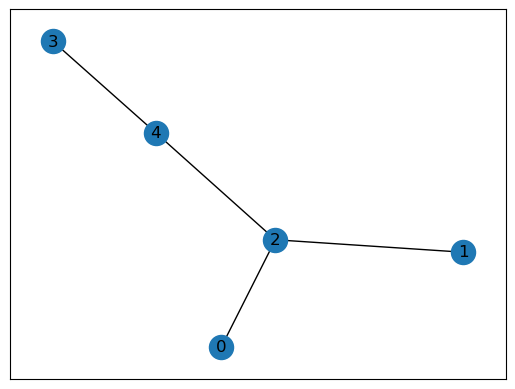

In [ ]:
import networkx as nx
G = nx.gnp_random_graph(n=5, p=0.5)
nx.draw_networkx(G, with_labels=True)

Drawing networks with colored nodes.

In [2]:
import networkx as nx
import random

#
# when seed is None, the graph is randomly generated and colored.
#
def randomly_colored_graph(n, pair_prob=0.5, color_prob=0.25, seed=2022):
    random.seed(seed)
    G = nx.Graph()
    for i in range(n):
        if random.random() < color_prob:
            G.add_node(i, color='red')
        else:
            G.add_node(i, color='white')
    for i in range(n):
        for j in range(i+1,n):
            if random.random() < pair_prob:
                G.add_edge(i,j)
    return G


def draw_colored_graph(G):
    nx.draw_networkx(
        G, 
        with_labels=True, 
        node_color=[ G.nodes[i]['color'] for i in G.nodes ],
    )



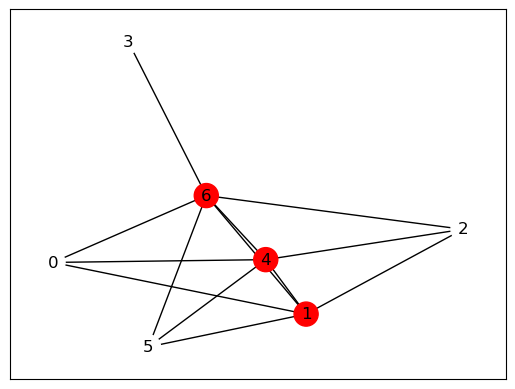

In [3]:
G = randomly_colored_graph(7, pair_prob=0.6, color_prob=0.3, seed=78)
draw_colored_graph(G)

In [4]:
print(G.nodes[0])
print(G.nodes[0]['color'])

{'color': 'white'}
white


In [5]:
(3,6) in G.edges, (6,3) in G.edges, (3,0) in G.edges

(True, True, False)

In [9]:
for u,v in G.edges:
    print((u,v))

(0, 1)
(0, 4)
(0, 6)
(1, 2)
(1, 4)
(1, 5)
(1, 6)
(2, 4)
(2, 6)
(3, 6)
(4, 5)
(4, 6)
(5, 6)


Useful graph attributes/methods:
+ .nodes
+ .edges, edge membership

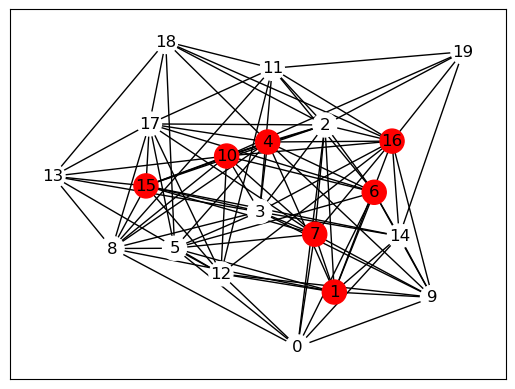

In [10]:
my_network = randomly_colored_graph(20, pair_prob=0.5, color_prob=0.3, seed=78)
draw_colored_graph(my_network)

### find all triangles in a network.

A triangle is a group of exactly 3 nodes that are connected.

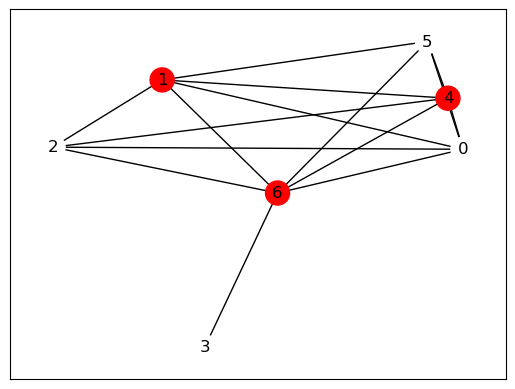

In [37]:
draw_colored_graph(G)

How do we represent the set of nodes {2, 4} in this graph?

[False, False, True, False, True, False, False].

In [43]:
def is_triangle(solution, g):
    the_nodes = [i for i in range(len(solution)) if solution[i]==True]
    if len(the_nodes)!=3:
        return False
    a, b, c = the_nodes
    return (a,b) in g.edges and (b,c) in g.edges and (a,c) in g.edges

def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]]

def generate(solution, i, possibilities, g):
    if i==len(solution):
        if is_triangle(solution, g):
            print(get_nodes(solution))
    else:
        for possibility in possibilities(solution, i, g):
            solution[i] = possibility
            generate(solution, i+1, possibilities, g)
            
def possibilities(solution, i, g):
    the_nodes = []
    for j in range(i):
        if solution[j]==True:
            the_nodes.append(j)
    if len(the_nodes)>3:
        return []
    for v in the_nodes:
        if (i,v) not in g.edges:
            return [False]
    return [True,False]

def all_triangles(g):
    solution = [None]*len(g)
    generate(solution, 0, possibilities, g)

In [44]:
all_triangles(G)

[0, 1, 4]
[0, 1, 6]
[0, 4, 6]
[1, 2, 4]
[1, 2, 6]
[1, 4, 5]
[1, 4, 6]
[1, 5, 6]
[2, 4, 6]
[4, 5, 6]


In [45]:
all_triangles(G)

[0, 1, 4]
[0, 1, 6]
[0, 4, 6]
[1, 2, 4]
[1, 2, 6]
[1, 4, 5]
[1, 4, 6]
[1, 5, 6]
[2, 4, 6]
[4, 5, 6]


A solution is a set of nodes.

A solution is a list of boolean values.

solution[0] being True means that the node 0 is in this solution.

So, the nodes {0, 1, 5, 6} in a graph with 7 nodes can be represented as [True, True, False, False, False, True, True].


Applications of backtracking:
* Find groups of mutual friends with 3 persons.
* Find triangles with two red nodes


How should solutions be represented?
+ solution is a set of nodes.
+ solution is a list of boolean values.  solution[j] is True if node j is in the set.

### Review: finding triangles

##### The backtracking template

In [2]:

def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]]
     
def generate(solution, i, possibilities, g):
    if i==len(solution):
        if is_triangle(solution, g):
            print(get_nodes(solution))
    else:
        for possibility in possibilities(solution, i, g):
            solution[i] = possibility
            generate(solution, i+1, possibilities, g)
       

##### Checking if a solution is a triangle

Note: a solution is a list of True's and False's.

Why?  A solution is a set of nodes.

A set of $n$ things can be represented as a list of $n$ boolean values.

solution[**i**] is True means node **i** is in the set.


In [1]:
def is_triangle(solution, g):
    the_nodes = [i for i in range(len(solution)) if solution[i]==True]
    if len(the_nodes)!=3:
        return False
    a, b, c = the_nodes
    return (a,b) in g.edges and (b,c) in g.edges and (a,c) in g.edges


##### Finding the possibilities to set solution[i] (node i)

Which possibilities are there for solution[i] or node i?
+ True or False (including or excluding from the solution)
+ True
+ False
+ None


First, we need to figure out which among nodes 0, 1, ..., i-1, which one are already selected.

Second, if there are more than 3 nodes, we do not need to explore additional nodes for possibily including them in the solution.

Third, for a selected node v ($0 \le v \le i-1$), if (v, i) is not an edge, then there is no need to select i.



In [3]:
#
# Output: a list of possibilities
#
def possibilities(solution, i, g):
    selected_nodes = []
    for j in range(i):
        if solution[j]==True:
            selected_nodes.append(j)
    
    if len(selected_nodes)>3:
        return []
    
    for v in selected_nodes:
        if (i,v) not in g.edges:
            return [False]
        
    return [True,False]


##### Now use the template to find all triangles

In [4]:

def all_triangles(g):
    solution = [None]*len(g)
    generate(solution, 0, possibilities, g)
    